* This notebook done by:
* Bdoor Soliman ADdoghaim - 
* Najed Abdulrhman Alkalaf - 
* Omyma Hamad Alfarraj - 

# Solving Problems by Searching

## Contents:

* 1. Introduction
* 1.1. Objectives
* 1.2. Main Concepts
* 1.2.1. Problem Formulation
* 1.2.2. Informed Search
* 1.2.3. Local Search

* 2. An example problem: Traveling Salesman Problem (TSP)
* 2.1. Problem Explanation
* 2.2. Problem Formulation

* 3. A* Algorithem
* 3.1. Explanation
* 3.2. Implementation
* 3.3. Testing A* Algorithm on several samples

* 4. Simulated Annealing Algorithm
* 4.1. Explanation
* 4.2. Implementation
* 4.3. Testing Simulated Annealing Algorithm on several samples

* 5. References and resources

## 1. Introduction

### 1.1. Objectives
This notebook is for computer scince students and any person interested in artificial intelligence algorithms. The main objectve is to finding a solution for problems by using informed and local search algorithms.

### 1.2. Main Concepts

  #### 1.2.1. Problem Formulation

###### Initial state :
 city 0; which is the salesman's current city.

###### Actions:
travel from one city to another one by these actions:
- go right
- go left
- go up
- go down 
- go up-right
- go up-left
- go down-right
- go down-left

###### Transition model:
Given a state and action, this will return the resulting space,
for example, if the salesman travels from city 0 to city 1 this will affect in the path cost and he will have more options for various cities to travel.

###### State space:
various cities; depending on the number of cities that user entered.

###### Goal test:
the salesman visits each city only once that starts and ends at city 0.

#### 1.2.2. Informed Search
The informed search is one that uses problem specific knowledge instead of the definition of the problem itself. And their methods may have access to a heuristic function h(n) that estimates the cost of a solution from node n.

###### Heuristic functions
Heuristic function, denoted h(n), also called simply a heuristic, is used to generate heuristic value, this value tells the algorithm the estimated cost of the cheapest path from the state at node n to a goal state. In other words, it tells the algorithm which path will provide the solution as early as possible. 

The performance of heuristic search algorithms depends on the quality of the heuristic function. One can sometimes construct good heuristics by relaxing the problem definition, by storing precomputed solution costs for subproblems in a pattern database, or by learning from experience with the problem class.

The heuristic functions are the most common form in which additional knowledge of the problem is imparted to the search algorithm and guide it. 

###### A*
   A-star, denoted A*, is one of the most successful search algorithms to find the shortest path between nodes or graphs. It is an informed search algorithm, as it uses information about path cost and uses heuristics to find the solution.

 A* search expands nodes with minimal f(n), where f(n) = g(n) + h(n). Also, it achieves optimality and completeness, two valuable property of search algorithms. When a search algorithm has the property of optimality, it means it is guaranteed to find the best possible solution. When a search algorithm has the property of completeness, it means that if a solution to a given problem exists, the algorithm is guaranteed to find it. But the space complexity of A∗ is still excessive. 

   To understand how A* works, first we need to understand a few terminologies:

1. Node (also called State): All potential position or stops with a unique identification.
2. Transition: The act of moving between states or nodes. 
3. Starting Node: Where to start searching.
4. Goal Node: The target to stop searching.
5. Search Space: A collection of all nodes.
6. Cost: Numerical value for the path from a node to another node.
7. g(n): The exact cost of the path from the starting node to any node n.
8. h(n): The heuristic estimated cost from node n to the goal node.
9. f(n): The lowest cost in the neighboring node n.

#### 1.2.3. Local Search

###### Complete vs incremental problem configurations
What is meant by search algorithm completeness or incremental configurations ?

If an search algorithm is complete, it means that if at least one solution exists then the algorithm is guaranteed find a solution in a finite amount of time.

Incremental search algorithm reuses information from previous searches to find solutions to a series of similar search problems potentially faster than is possible by solving each search problem from scratch.

###### Simulated annealing
Is an optimization method which mimics the slow cooling of metals, which is characterized by a progressive reduction in the atomic movements that reduce the density of lattice defects until a lowest-energy state is reached.

Is a probabilistic technique for approximating the global optimum of a given function Specifically, it is a metaheuristic to approximate global optimization in a large search space for an optimization problem, It is often used when the search space is discrete, For problems where finding an approximate global optimum is more important than finding a precise local optimum in a fixed amount of time.

## 2. An example problem: Traveling Salesman Problem (TSP)

### 2.1. Problem Explanation
Travelling Salesman Problem (TSP), also known as Travelling Salesperson Problem, is a problem of a salesman who needs to visit several customers located in different cities and tries to find the shortest path to complete this task.

TSP tries to find a Hamiltonian cycle with minimal path weight in a graph. The Hamiltonian cycle problem is to find if there exist a tour that visits every city exactly once. So, again, the problem is to find a minimum weight Hamiltonian Cycle.
The TSP is a famous NP hard problem. There is no polynomial time know solution for this problem.

### 2.2. Problem Formulation
Given a set of cities, weighted edge which is the distance between every pair of cities and a directed graph. And runs for finding the shortest cyclic path that visits every node in this graph exactly once.


## 3. A* Algorithm

### 3.1. Explanation
A* search algorithm is a path-finding algorithm used in artificial intelligence which is used for solving shortest path problems and it's also used to help solving problems related to the games to find the shortest path in an efficient way.

How does this algorithm work?

First, we consider a graph with multiple nodes (see figure1). Each node has a heuristic (heuristic function is a function that ranks alternatives in search algorithms at each branching step based on available information to decide which branch to follow ) and there is a distance value between each 2 nodes they have a path (it called "path cost").
Our goal is to arrive to the goal node starting from the first node as soon as possible.

![A-star.png](A-star.png)
figure 1

The algorithm uses this function to find the shortest path:

f(n)= g(n) + h(n)

where:

n: the previous node on the path.

g(n): the cost of the path from the start node to n.

h(n): a heuristic that estimates the cost of the cheapest path from n to goal (end) node.

So, it visits the first node and apply the previous function; it calculates f(n) for every child he has, then it takes the smallest f(n) from them and choose it to be a new start node.

Then apply same steps to the new start node (with notice if we want to calculate the value of g(n) we addition all the paths costs starting from the first node) then it chooses a new start node and repeat the previous steps until it arrives to the end node.

### 3.2. Implementation

In [ ]:
#This is an implementation and applying of A* algorithm on TSP.
# Modules
import random
import time

class TSP(object):
    
    #Generates distance between 2 points
    def getDistance(self,P1,P2): 
        self.P1 = P1
        self.P2 = P2
        distance = ((self.P1[0]-self.P2[0])**2 + (self.P1[1]-self.P2[1])**2)**(1/2)
        return distance

    def generateCoordinates(self):
        x = random.randint(0,101)
        y = random.randint(0,101)
        return [x,y]

    #Calculates the total distance in a state, eg [0,1,2,3]
    def calculateDist(self,s,n): 
        self.calD = s
        self.nu = n
        dist = 0
        total = 0  
        for i in range(self.nu):
            xi = self.calD[i]
            yj = self.calD[i+1]
            dist = self.getDistance(self.coord[xi],self.coord[yj])
            total+=dist    
        return total
    
    #Generates the total  heuristic plus path cost and sends it out
    def hue(self,chosenList,cityList): 
        toCheck = cityList[:]
        SPL = chosenList[:]
        dl = 999999999
        fCost =[]
        l=[]
            
        for i in chosenList:
                toCheck.remove(i)
            
        for e in toCheck:
            l.clear()
            l.append(e)
            rest = cityList[:]
            totalDist = 0
            
            while len(rest) > 0:
                dl=99999
                for i in l:
                    if i in rest:
                        rest.remove(i)
                
                for n in l:
                    for m in rest:
                        d = self.getDistance(self.coord[n],self.coord[m])
                        if d<dl:
                            dl = d
                            c = m
                
                if c not in l:
                    l.append(c)
                    
                totalDist += d
            
            g = self.getDistance(self.coord[e],self.coord[SPL[-1]])
            k = self.getDistance(self.coord['0'],self.coord[e])
            f = g+totalDist+k
            
            fCost.append((f,e))
            
        fCost.sort()

        return (fCost[0][1])

    def solver(self): 
        
        #Take number of cities from the user
        print("Enter the number of cities to generate: ")
        number = input()  
        self.coord ={}
        cityList = []
        chosenList = ['0']
        self.number = int(number)
        for i in range(self.number):
            a = str(i)
            l = self.generateCoordinates()
            self.coord[a] = l
            cityList.append(a)
        
        currentState = cityList[:]
                
        for i in range(len(cityList)-1):        
            x = self.hue(chosenList,cityList)
            chosenList.append(x)
        
    
        final = chosenList + ['0']
        il = cityList + ['0']
        
        fd = self.calculateDist(final,len(final)-1)
        id = self.calculateDist(il,len(il)-1)
        
        print("\nInitial state looked like this:\n",il,"\n")
        print("Initial distance was %.2f km \n" %id)
        print("Final state looks like this:\n",final,"\n" )
        print("Optimized distance is %.2f km \n" %fd)
  
         
def main():
    start = time.time()
    tsp = TSP() 
    tsp.solver()
    end = time.time()
    print("Time measure: %.2f sec" % (end-start))

if __name__ == "__main__":
    main()          
            

Enter the number of cities to generate: 
10

Initial state looked like this:
 ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0'] 

Initial distance was 513.70 km 

Final state looks like this:
 ['0', '3', '4', '1', '9', '5', '7', '8', '6', '2', '0'] 

Optimized distance is 398.91 km 

Time measure: 3.20 sec


### 3.3. Testing A* Algorithm on several samples:


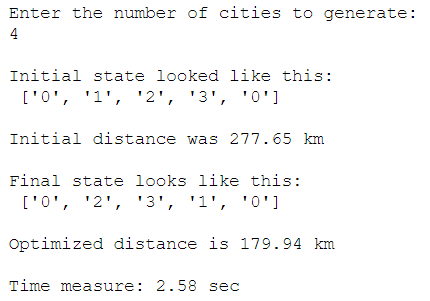

Second sample "13 Cities in KSA": ![A-star-test13-Saudi.PNG](A-star-test13-Saudi.PNG)

Third sample "50 States in USA": ![A-star-test50-America.PNG](A-star-test50-America.PNG)

## 4. Simulated Annealing Algorithm

### 4.1. Explnation
Inspired by physics and physical laws, the annealing process algorithm is used to solve many problems (optimization problems) Where the algorithm relies on a random mathematical method in order to find maximum solutions - upper and lower - for many issues. In fact, the strength of the annealing simulation algorithm lies in its ability to avoid falls with local maximum , The solutions provided by the algorithm are almost better than other algorithms, but they are not the best at all. This can be visualized by visualizing a 2D drawing, as shown in the figure below. Where each coordinate point on the x-axis represents a solution, and each coordinate point on the y-axis represents the quality of this solution.

![SA.png](attachment:SA.png)

How the algorithm works:
1. At first, generate a random solution.
2. Calculating the cost using one of the dependencies that you have defined.
3. Generate a neighboring random solution.
4. Calculating the cost of the new solution.
5. Make the following comparisons:

-If (the cost of the new solution is "smaller" than the cost of the old solution) = <then the transition to the new solution will take place

-If (the cost of the new solution is “greater” than the cost of the old solution) = <“perhaps” the transition to the new solution will be made.
6. Repeat steps 3 through 5 until an acceptable solution is reached, or the algorithm reaches the maximum permissible frequency.

### 4.2. Impementation

In [ ]:
#This is an implementation and applying of SA algorithm on TSP.
# Modules
import time
import math
import numpy as np
import matplotlib.pyplot as plt

global input_data

# calulate length between two points
def length (n1,n2):
    return math.sqrt((n1[0] - n2[0])**2 + (n1[1] - n2[1])**2)

# calculate total length to traverse all points
def total_length(arr,n):
    l = length(arr[0],arr[n-1])
    for i in range(n-1):
        l+= length(arr[i],arr[i+1])
    return l

# two_opt optimization for simulated annealing, using a random probabilty function to do selection
def two_opt_optimization(sol_arr,t,n):

    # picking two pair of consecutive integers, making sure they are not same
    ai = np.random.randint(0,n-1)
    bi = (ai+1)%n 
    ci = np.random.randint(0,n-1)
    di = (ci+1)%n

    if ai != ci and bi != ci:
        a = sol_arr[ai]
        b = sol_arr[bi]
        c = sol_arr[ci]
        d = sol_arr[di]

        # old lengths
        ab = length(a,b)
        cd = length(c,d)
        # new lengths, if accepted by our probability function
        ac = length(a,c)
        bd = length(b,d)

        diff = ( ab + cd ) - ( ac + bd )

        p = 0
        # for negative diff-> we'll use boltzman probabilty distribution equation-> P(E)=exp(-E/kT)
        # k is considered to be 1
        if diff < 0:
            p = math.exp( diff/t )

        # we'll sometimes skip the good solution
        elif diff > 0.05 :
            p = 1

        if(np.random.random() < p ):
            new_arr = list(range(0,n))
            new_arr[0] = a
            i = 1

            while bi!= ci:
                new_arr[i] = c
                i = i+1
                ci = (ci-1)%n

            new_arr[i] = sol_arr[bi]
            i = i+1

            while ai!= di:
                new_arr[i] = sol_arr[di]
                i = i+1
                di = (di+1)%n

            return new_arr

    return sol_arr

# Simmulated Annealing algorithm
def sa_algorithm (input_data):

    #length of input_data
    n = len(input_data)

    #creating a base solution
    sol_arr = input_data

    #plot initial solution
    plt.axis([-100,1100,-100,1100])
    plt.plot(input_data[:,0],input_data[:,1],'ro')

    #initial temperature
    t = 100

    #current length
    min_l = total_length(sol_arr,n)

    i = 0
    best_arr = []
    while t > 0.1:
        i = i + 1

        #two_opt method- for optimization
        sol_arr = two_opt_optimization(sol_arr,t,n)

        #after 200 steps restart the process until the temperature is less than 0.1
        if i >= 200 :
            i = 0
            current_l = total_length(sol_arr,n)

            #keeping the cooling schedule slow
            t = t*0.9995

            if current_l < min_l:
                min_l = current_l
                best_arr = sol_arr[:]

    return best_arr

def main():
    start = time.time()
    n = 0
    # creating random inputs
    print("Enter the amount of inputs:")
    n = input()
    input_data = np.random.randint(1000,size =(int(n),2))
    final_arr = sa_algorithm(input_data)
    final_l = total_length(final_arr,int(n))
    end = time.time()
    
    print("\nThe minimum length using SA algorithm: ", final_l)
    print("\nTime measure: %.2f sec" % (end-start))
    print("\nVisualisation of the optimal solution:\n")

if __name__ == "__main__":
    main()          


Enter the amount of inputs:
20

The minimum length using SA algorithm:  542.9290929762376

Time measure: 52.48 sec

Visualisation of the optimal solution:



### 4.3. Testing Simulated Annealing Algorithm on several samples:


First sample:![SAtest23.PNG](SAtest23.PNG)

Second sample: ![SAtest100.PNG](SAtest100.PNG)

Third sample: ![SAtest248.PNG](SAtest248.PNG)

## 5. References and resources


1.	B. Roy, ‘A-Star (A*) Search Algorithm’, Medium, 23-Feb-2020. [Online]. Available: https://towardsdatascience.com/a-star-a-search-algorithm-eb495fb156bb.
2.	H. H. Hoos and T. Stützle, ‘1 - INTRODUCTION’, in Stochastic Local Search, H. H. Hoos and T. Stützle, Eds. San Francisco: Morgan Kaufmann, 2005, pp. 13–59.
3.	S. J. Russell, P. Norvig, and E. Davis, Artificial intelligence: a modern approach, 3rd ed. Upper Saddle River: Prentice Hall, 2010.
4.	‘Traveling Salesman Problem (TSP) Implementation’, GeeksforGeeks, 11-Nov-2017. [Online]. Available: https://www.geeksforgeeks.org/traveling-salesman-problem-tsp-implementation/. [Accessed: 21-Mar-2020].
5.	‘الحلقة 1 : خوارزمية محاكاة التلدين Simulated Annealing Algorithm’, Schwarz tiger’s Weblog, 10-Aug-2017. [Online]. Available: https://schwarztiger.wordpress.com/2017/08/10/%d8%a7%d9%84%d8%ad%d9%84%d9%82%d8%a9-1-%d8%ae%d9%88%d8%a7%d8%b1%d8%b2%d9%85%d9%8a%d8%a9-%d9%85%d8%ad%d8%a7%d9%83%d8%a7%d8%a9-%d8%a7%d9%84%d8%aa%d9%84%d8%af%d9%8a%d9%86-simulated-annealing-algorithm/. [Accessed: 24-Mar-2020].
6. Pearl, Judea (1984). Heuristics: intelligent search strategies for computer problem solving. United States